In [1]:
# Introduction to scikit learn (Sklearn)

What_we_are_covering = [
"0. An end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together."
    ]


In [2]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

In [96]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting the data ready to be used with machine learning

Three main things we have to do:

         1. Split the data into features and labels (usually `X` & `y`)
         2. Filling (also called imputing) or disregarding missing values
         3. Converting non-numerical values to numerical values (also called feature encoding)
     

In [4]:
# data
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1. Make sure its all numerical

In [9]:
car_sales = pd.read_csv("/home/ogonna/Desktop/Udemy_ML_and_DS/scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
car_sales.shape

(1000, 5)

In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [12]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [13]:
# Split data into X and y
X=car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into ttain and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2) 

In [14]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [15]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

## Handling categorical variables

In [16]:
# Turn the categories into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
                        [("one_hot", 
                         one_hot,
                        categorical_features)],
                       remainder ="passthrough")

transformed_X =transformer.fit_transform(X)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [18]:
# Alternatively
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])*1
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [19]:
# Let's refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size =0.2) 

model.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?
   1. Fill them with some values (also know as imputation)
   2. Remove the samples with missing data algother

In [21]:
# Import car sales missing data
car_sales_missing = pd.read_csv("/home/ogonna/Desktop/Udemy_ML_and_DS/scikit-learn-data/car-sales-extended-missing-data.csv")

In [22]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
# Split data into X and y
from sklearn.model_selection import train_test_split
X=car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# split into ttain and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2) 

In [25]:
# Let's try and convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer( [("One_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [26]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


## Option 1: Fill missing data with Pandas

In [27]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


/tmp/ipykernel_20933/1950311624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/tmp/ipykernel_20933/1950311624.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [28]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [29]:
len(car_sales_missing)

1000

In [30]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [31]:
len(car_sales_missing)

950

In [32]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [33]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer( [("One_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_dataframe = transformer.fit_transform(car_sales_missing)

In [34]:
pd.DataFrame(transformed_dataframe)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill Mising Values with Scikit-Learn

In [35]:
car_sales_missing = pd.read_csv("/home/ogonna/Desktop/Udemy_ML_and_DS/scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Drop the rows without labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [38]:
# split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [39]:
# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [40]:
# Fill missing values with scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with means
cat_imputer = SimpleImputer(strategy ="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy ="constant", fill_value=4)
numeri_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features =["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("catego_imputer", cat_imputer, cat_features),
    ("Door_imputer", door_imputer, door_features),
    ("numerical_imputer", numeri_imputer, num_features) 
    
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
print(filled_X_train)

filled_X_test = imputer.fit_transform(X_test)
print(filled_X_test)



[['missing' 'Black' 4.0 27139.0]
 ['Toyota' 'Red' 4.0 98854.0]
 ['Nissan' 'Blue' 4.0 124116.0]
 ...
 ['Honda' 'White' 4.0 248301.0]
 ['Nissan' 'White' 4.0 166735.0]
 ['Honda' 'Blue' 4.0 196835.0]]
[['Toyota' 'Blue' 4.0 95993.0]
 ['Honda' 'Blue' 4.0 223005.0]
 ['Toyota' 'Blue' 4.0 126225.68926553673]
 ['Toyota' 'Blue' 4.0 232912.0]
 ['Honda' 'Black' 4.0 16933.0]
 ['Honda' 'Blue' 4.0 50417.0]
 ['Nissan' 'Red' 3.0 113278.0]
 ['Toyota' 'Black' 4.0 90508.0]
 ['Toyota' 'Red' 4.0 33400.0]
 ['Honda' 'Blue' 4.0 68223.0]
 ['Toyota' 'Green' 4.0 218482.0]
 ['Toyota' 'White' 4.0 197393.0]
 ['Nissan' 'White' 4.0 116279.0]
 ['Honda' 'Green' 4.0 164493.0]
 ['missing' 'White' 3.0 66461.0]
 ['Honda' 'Green' 4.0 126225.68926553673]
 ['Nissan' 'Black' 4.0 170777.0]
 ['BMW' 'White' 5.0 16274.0]
 ['Honda' 'Green' 4.0 54721.0]
 ['Toyota' 'Green' 4.0 241507.0]
 ['Honda' 'White' 4.0 166028.0]
 ['missing' 'White' 3.0 155144.0]
 ['Nissan' 'Green' 3.0 153554.0]
 ['Toyota' 'White' 4.0 216647.0]
 ['BMW' 'Blue' 3.0 

In [41]:
df_X_train_filled = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
df_X_train_filled.head()



,Make,Colour,Doors,Odometer (KM)
0,missing,Black,4.0,27139.0
1,Toyota,Red,4.0,98854.0
2,Nissan,Blue,4.0,124116.0
3,Nissan,Blue,3.0,197823.0
4,Honda,missing,4.0,48069.0


In [42]:
df_X_test_filled = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
df_X_test_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,95993.0
1,Honda,Blue,4.0,223005.0
2,Toyota,Blue,4.0,126225.689266
3,Toyota,Blue,4.0,232912.0
4,Honda,Black,4.0,16933.0


In [43]:
df_X_train_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [44]:
# Turn the categories into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
                        [("one_hot", 
                         one_hot,
                        categorical_features)],
                       remainder ="passthrough")

transformed_X_train_filled =transformer.fit_transform(df_X_train_filled)
transformed_X_train_filled

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [45]:
transformed_X_test_filled =transformer.fit_transform(df_X_test_filled)
transformed_X_test_filled

<190x15 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In [46]:
# Now we have out data as numbers and no missing labels.
# Let's fit a model
#np.random.seed(23)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators =50)
model.fit(transformed_X_train_filled, y_train)
model.score(transformed_X_test_filled,y_test)

0.20582779962704034

In [47]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

## 2. Choose the rigt model/estimator/algorithm for our problems

Somethings to note:

* Sklearn refers to machine learning models, algorithms as estimatores.
* If you are working on a machine learning problem and looking to use Sklearn and not sure what model you should use, thn refer to the sklearning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
  

### 2.1 Picking a machine learning model for a regression problem

Let's see the California housing dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

(see https://scikit-learn.org/stable/datasets/real_world.html#, and https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [97]:
# Get California housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
housing_df["MedHouseval"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [98]:
# Import algorithm 

# Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop(["MedHouseval"], axis =1)
y = housing_df["MedHouseval"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)  # Coefficient of determination, R^2


0.5911128551684498

What if `Ridge` did not or the score did not fit our needs?

Well, we could try a different model...

How about we try an ensemble medel (an ensemble is a combination of smaller models to make a better prediction instead of a single model)

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [52]:
# Lasso model
from sklearn.linear_model import Lasso

np.random.seed(42)


model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
model_lasso.score(X_test,y_test)

0.2854847529538541

What id `Ridge` didn't work or the score didn't fit our needs?

Weel, we could always try a different model...

How about we try an ensemble model ( an ensemble model is a combination of smaller models to give better prediction than just a single model)?

Sklearnn ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [53]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train,y_train)
model_Rf.score(X_test,y_test)   # R^2 value

0.8078655075367563

In [54]:
# # support vector regression   ( Takes time to run)
# from sklearn.svm import SVR
# model_SVR = SVR(kernel="linear")
# model_SVR.fit(X_train,y_train)
# model_SVR.score(X_test,y_test)

## 2.2 Picking a machine learning model for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [58]:
heart_disease =pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map, it says to try `LinearSVC`.

In [76]:
# import algorithm
from sklearn.svm import LinearSVC

# set up random seed
np.random.seed(42)  # Different seeds gave worse scores

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = LinearSVC()

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)

/home/ogonna/miniconda3/envs/Erdos_boot_camp/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/ogonna/miniconda3/envs/Erdos_boot_camp/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

Let's try ensemble models

In [86]:
# import algorithm
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)

0.8524590163934426

Tidbit:


       1. If you have structured data (like tabular data), use ensemble methods.
       2. If you hae unstructured data, use deep learning or transfer learning.

Let's try KNN...

In [92]:
# import algorithm
from sklearn.neighbors import KNeighborsClassifier

# set up random seed
np.random.seed(42)  

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = KNeighborsClassifier()

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)

0.6885245901639344

Let's try SVC...

In [93]:
# import algorithm
from sklearn.svm import SVC

# set up random seed
np.random.seed(42)  

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = SVC()

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)

0.7049180327868853

In [100]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1. Fitting the model to the data

In [101]:
# import algorithm
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)

0.8524590163934426

### 3.2 Make predictions using machine learning model

1. `predict()`
2. `predict_proba()`

In [104]:
# Use a trained model to make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [107]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [106]:
len(y_test), len(y_pred)

(61, 61)

In [108]:
# compare predictions to truth labels to evaluate the model
np.mean(y_pred == y_test)

0.8524590163934426

In [109]:
model.score(X_test,y_test)

0.8524590163934426

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8524590163934426

 Make prediction with `predict_proba()`

In [113]:
model.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

`Predict()` can alis be used for regression modles.

In [114]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["MedHouseval"], axis=1)
y = housing_df["MedHouseval"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

preds = model.predict(X_test)



RandomForestRegressor()

In [117]:
model.score(X_test,y_test)   #R^2

0.8066196804802649

In [121]:
preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [122]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [123]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds, y_test)

0.3265721842781009

In [127]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

   1. Estimator's built-in `score()` method
   2. The `scoring` parameter
   3. Problem-specific metric functions

You can read more here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score() method

In [132]:

# import algorithm
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_estimators=1000)

#fit the model
model.fit(X_train,y_train)

# Check the score on test set
model.score(X_test,y_test)*100  # Accuracy score

86.88524590163934

Let's try the `score()` on a regression problem...

In [137]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["MedHouseval"], axis=1)
y = housing_df["MedHouseval"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

model.score(X_test,y_test)   #R^2

0.8066196804802649

In [136]:
model.score(X_test,y_test)   

0.8083290150437414

### 4.2 Evaluating a model using the scoring parameter

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_estimators=100)

#fit the model
model.fit(X_train,y_train)



RandomForestClassifier()

In [154]:
np.random.seed(42)

# Single training and test split
single_score = model.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
cross_vali_score = np.mean(cross_val_score(model, X,y, cv=5))

# Compare the two
cross_vali_score, single_score

(0.8248087431693989, 0.8524590163934426)

Always report cross-validation score instead

In [160]:
np.random.seed(42)
# scoring parameter set to None by default, implies using mean accuracy as the CV scoring metric
cross_val_score(model, X,y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1 Classification nodel evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion metrix
    4. Classification report

### Accuracy

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_estimators=100)

#fit the model
model.fit(X_train,y_train)
cross_vali_score = np.mean(cross_val_score(model, X,y, cv=5))

In [162]:
print(f"Heart Disease classification Cross-Validated Accuracy: {np.mean(cross_vali_score)*100:.2f}%")

Heart Disease classification Cross-Validated Accuracy: 81.16%


### Area under the receiver operating characteristics curve (ROC/AUC) 

* Area under the curve (AUC)
* ROC curve

  ROC curves are a comparison of a model's true postive rate (TPR) versus a model's false positive rate (FPR).

In [165]:
y_prob = model.predict_proba(X_test)

y_prob[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [167]:
y_prob_positive = y_prob[:,1]
y_prob_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [173]:
from sklearn.metrics import roc_curve
# Calculate FPR, TPR, and thresholds
FPR, TPR, thresholds = roc_curve(y_test,y_prob_positive)

FPR

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

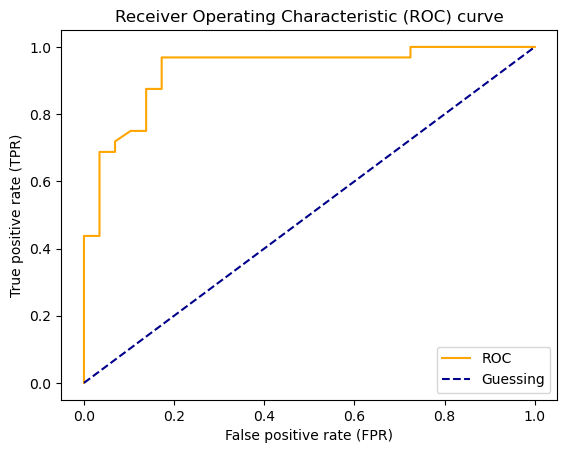

In [178]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """

    Plots a ROC curve given the false positive rate (FPR)
    and true positive rate (TPR) of a model.

    """
    # plot the curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label ="Guessing")

    # customize
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(FPR,TPR)

In [180]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)

0.9304956896551724

## Confusiion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [182]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]])

In [183]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


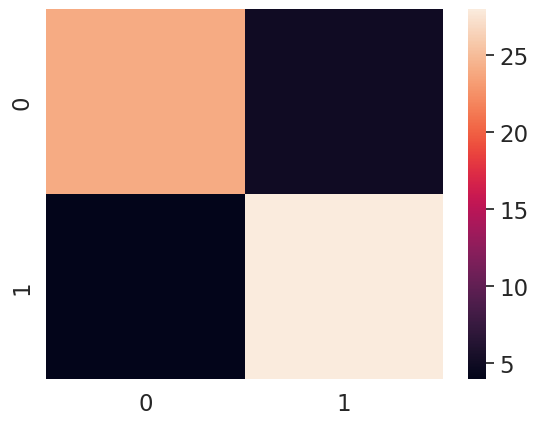

In [185]:
# Make our confusion matrix more visual white seaborn heat map

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
confu_mat = confusion_matrix(y_test,y_pred)

# plot it using seabore
sns.heatmap(confu_mat, );

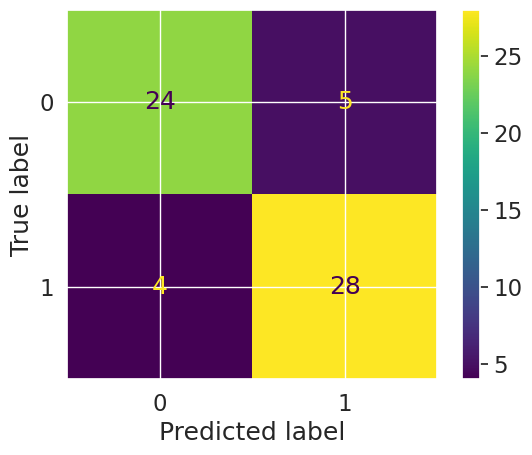

In [186]:
# Make our confusion matrix more visual white seaborn heat map

import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_test, y=y_test);

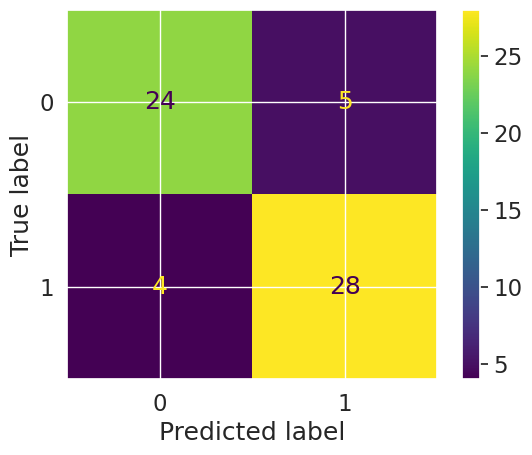

In [188]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);

### **Classification Report**

In [190]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [193]:
# Where precision and recall become valuable

disease_true =np.zeros(10000)
disease_true[0] = 1   # only one positive case

disease_preds = np.zeros(10000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/ogonna/miniconda3/envs/Erdos_boot_camp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ogonna/miniconda3/envs/Erdos_boot_camp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ogonna/miniconda3/envs/Erdos_boot_camp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

See here: https://scikit-learn.org/stable/modules/model_evaluation.html

We are covering:
1. R^2
2. Mean absolute error (MAE)
3. Mean square error (MSE)


**R^2**

In [194]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["MedHouseval"], axis=1)
y = housing_df["MedHouseval"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)




RandomForestRegressor()

In [195]:
model.score(X_test, y_test)

0.8066196804802649

In [198]:
y_test.mean()


2.0550030959302323

In [199]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())


In [201]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [202]:
r2_score(y_test,y_test_mean)

0.0

In [203]:
y_preds = model.predict(X_test)

In [204]:
r2_score(y_test,y_preds)

0.8066196804802649

**Mean absolute error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. 

It gives you an idea of how wrong your model's predictions are.

In [206]:
# MAE 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

0.3265721842781009

**Mean squared error (MSE)**



In [208]:
# MSE 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_preds)

0.2534073069137548

### 4.2.3 Finally using the scoring parameter



In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Instantiate the model
model = RandomForestClassifier(n_estimators=100)


In [213]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [214]:
# cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [217]:
# Accuracy
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [223]:
# Precison
np.random.seed(42)
cv_pre = cross_val_score(model, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_pre)}")

The cross-validated precision is: 0.8329547346025924


In [224]:
# Recall
np.random.seed(42)
cv_rec = cross_val_score(model, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_rec)}")

The cross-validated recall is: 0.8545454545454545


In [225]:
# f1
np.random.seed(42)
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")
print(f"The cross-validated f1 is: {np.mean(cv_f1)}")

The cross-validated f1 is: 0.8426854603423344


Let's  see the `scoring` parameter for regression problem

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["MedHouseval"], axis=1)
y = housing_df["MedHouseval"]

model = RandomForestRegressor()


In [228]:
# R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 is: {np.mean(cv_r2)*100:.2f}%")

The cross-validated R^2 is: 65.21%


In [233]:
# mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE is: {np.mean(cv_mse)}")

The cross-validated MSE is: -0.43011254261460774


In [235]:
# mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE is: {np.mean(cv_mae)}")

The cross-validated MAE is: -0.4662123287693799


## 4.3 Using different evaluation metric as Scikit-Learn functions

The third way to ealuate scikit-learn ML mpdel is to use the `sklearn.metric` model

In [240]:
# Calsssification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)  # Different seeds gave better scores, e.g., 4

# Make the data
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_estimators=100)

#fit the model
model.fit(X_train,y_train)

#make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"precision: {precision_score(y_test,y_preds)}")
print(f"recall: {recall_score(y_test,y_preds)}")
print(f"f1: {f1_score(y_test,y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
precision: 0.8484848484848485
recall: 0.875
f1: 0.8615384615384616


In [242]:
# Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop(["MedHouseval"], axis=1)
y = housing_df["MedHouseval"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

#make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluation functions
print("Regression metrics on the test set")
print(f"r2: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")



Regression metrics on the test set
r2: 80.66%
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [244]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

# 5. Improving a model

First predictions = baseline prediction
First model = baseline model

 #### *How can we improe the model?*
From a data perspective:
* Can we collect more data? (generally, the more data, the better)
* Can we improve our data, e.g., can we create more useful features?

From a model perspective:
* Is there a better model we could use?
* Can we  improve the current model?

Hyperparameters vs. Parameters

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

In [245]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()


In [246]:
# Getting model hyperparameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### *Three ways to adjust hyperparameters:*

1. By hand
2. Randomly with RandomSearchC
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameter by hand

We are going to tune the following:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`
  



In [268]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparison on y_true lables vs. y_pred lables 
    on a classifaction
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {"accuracy": round(accuracy,2),
                    "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)
                  }
    print(f"accuracy: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")

    return metric_dict

In [271]:
# train-valid-test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

# Shuffle the data
heart_disease_shuffle =heart_disease.sample(frac=1) # shuffle all the data

# Split into X and y
X = heart_disease_shuffle.drop("target", axis=1)
y=heart_disease_shuffle["target"]

# Split the data into train, validation and test set
train_split = round(0.7*len(heart_disease_shuffle)) # 70% of data
valid_split = round(train_split+ 0.15*len(heart_disease_shuffle)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:] 

# Baseline model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make baseline predictions
y_preds = model.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics



accuracy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [265]:
len(y_valid),len(y_preds), len(X_valid)

(45, 45, 45)

In [277]:
np.random.seed(42)

# Create a second classifier with different hyperparameter

model2 = RandomForestClassifier(n_estimators=1000)
model2.fit(X_train, y_train)

# Make baseline predictions
y_preds_2 = model.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics_2 = evaluate_preds(y_valid,y_preds_2)
baseline_metrics_2


accuracy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [285]:
np.random.seed(42)

# Create a second classifier with different hyperparameter

model3 = RandomForestClassifier(n_estimators=100, max_depth=10)
model3.fit(X_train, y_train)

# Make baseline predictions
y_preds_3 = model.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics_3 = evaluate_preds(y_valid,y_preds_3)
baseline_metrics_3


accuracy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [310]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5,10,20,30],
        "max_features": ['sqrt', 'log2', 0.5],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffle.drop("target", axis=1)
y=heart_disease_shuffle["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10,   # number of models to try
                              cv=5,
                              verbose=2)



# Fit the RandomizedSearchCV version of model
rs_model.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=

In [313]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [314]:
# Make prediction with the best hyperparamters
rs_y_preds = rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)
rs_metrics

accuracy: 83.61%
precision: 0.78
recall: 0.89
f1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 5.3 Hyperparameter tuning with GridSearchCV

In [297]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', 0.5],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [317]:
3*1*2*1*2

12

In [301]:
grid2 = {"n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": ['sqrt', 'log2'],
        "min_samples_split": [2],
        "min_samples_leaf": [4,6]}

In [304]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffle.drop("target", axis=1)
y=heart_disease_shuffle["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_model = GridSearchCV(estimator=model,
                              param_grid=grid2,
                              cv=5,
                              verbose=2)



# Fit the RandomizedSearchCV version of model
gs_model.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, 

In [305]:
# parameters of the best model
gs_model.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [309]:
gs_y_preds = gs_model.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)


accuracy: 81.97%
precision: 0.76
recall: 0.89
f1: 0.82


Let's compare our different model matrics

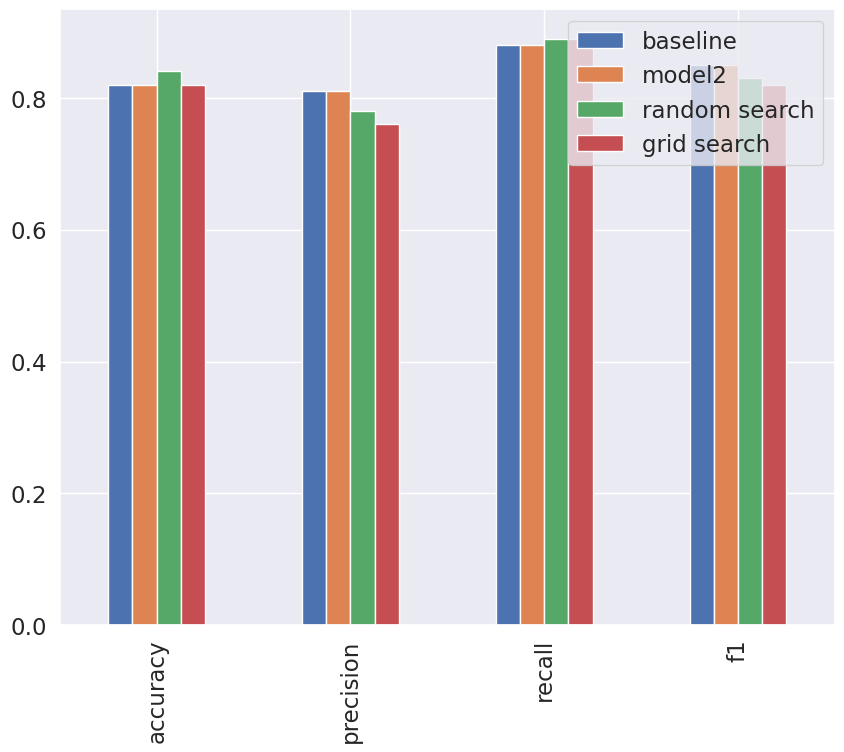

In [316]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "model2": baseline_metrics_2,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
    
compare_metrics.plot.bar(figsize=(10,8));

In [318]:
What_we_are_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

## 6. Saving and loading trained machine learning models

Two ways to save and load a ML model:
1. With Python's `pickle` module
2. With the `joblib` module

   **Pickle**



In [319]:
import pickle

# save an existing model to a file
pickle.dump(rs_model, open("rs_random_forest_model_1.pkl", "wb"))

In [320]:
# Load a saved model

load_pickle_model =pickle.load(open("rs_random_forest_model_1.pkl", "rb")) 

In [321]:
# make predictions
pickle_y_pred = load_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_pred)

accuracy: 83.61%
precision: 0.78
recall: 0.89
f1: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [322]:
from joblib import dump, load

# save model to file
dump(gs_model, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [323]:
# import a saved joblib model
loaded_job_nodel = load(filename="gs_random_forest_model_1.joblib")

In [325]:
# make predictions
joblib_y_pred = loaded_job_nodel.predict(X_test)
evaluate_preds(y_test,joblib_y_pred)

accuracy: 81.97%
precision: 0.76
recall: 0.89
f1: 0.82


{'accuracy': 0.82, 'precision': 0.76, 'recall': 0.89, 'f1': 0.82}

**Note:**

When working with large models, it is better to use `joblib` instead of `pickle`.

## 7. Putting it all together

In [336]:
data = pd.read_csv("/home/ogonna/Desktop/Udemy_ML_and_DS/scikit-learn-data/car-sales-extended-missing-data.csv")

In [338]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [339]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [340]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [347]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setuo random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing lables
data = pd.read_csv("/home/ogonna/Desktop/Udemy_ML_and_DS/scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer piplines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                         ("one_hot", OneHotEncoder(handle_unknown = "ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"] 
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])


# Setup preprocessing steps (fill missing values, then convert to numbers) 
preprocessor = ColumnTransformer(
                      transformers=[("cat", categorical_transformer, categorical_features),
                                   ("door", door_transformer, door_features),
                                   ("numerical", numeric_transformer, numeric_features)])


# create a preprocessing and modling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor),
                          ("model", RandomForestRegressor())])


# Split the data
X=data.drop("Price", axis=1)
y=data["Price"]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

It is also possible to use `GridSearchCV` or `RanomizedSerachCV` with our `Pipeline`.

In [350]:
# Use GridSearchCV with our regressiion Pipeline

pipe_grid = {
            "preprocessor__numerical__imputer__strategy": ["mean", "median"],
            "model__n_estimators":[100,1000],
            "model__max_depth":[None,5],
            "model__max_features":["log2"],
            "model__min_samples_split":[2,4]
            }

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_f

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numerical__imputer__strategy': ['mean',
                                                                        'median']},
             verbose=2)

In [352]:
gs_model.score(X_test,y_test)

0.2970584538514702

In [355]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'log2',
 'model__min_samples_split': 4,
 'model__n_estimators': 100,
 'preprocessor__numerical__imputer__strategy': 'median'}